# House Price Prediction using ANN with forward and backward propagation

ID: ASGN2802

House Price Prediction using Forward and Backward Propagation

Tasks:

1. Data Preprocessing:

    - Load the dataset and handle missing values.
    - Encode categorical features.
    - Normalize numerical features.

2. Initialize Weights and Biases:

    - Randomly initialize weights and biases for a single-layer neural network.

3. Forward Propagation:

    - Compute the linear combination of inputs and weights.
    - Apply the ReLU activation function to compute the output.

4. Backward Propagation:

    - Calculate the loss using Mean Squared Error.
    - Compute gradients of the loss with respect to weights and biases.

5. Gradient Descent:

    - Update weights and biases using the gradients computed.

6. Activation Functions:

    - Compare the performance and gradient behavior using ReLU vs. Tanh.
    - Plot gradients and loss curves for both activation functions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [4]:
house_data = pd.read_csv('house_price_prediction_dataset.csv')
house_data.head()

,Bedrooms,Bathrooms,Square Footage,House Age,Distance to City Center,Has Garage,Neighborhood Quality,Lot Size,Year Built,Number of Floors,House Price
0,4.0,3.0,1056.0,82.0,19.495982,1.0,Low,0.279486,2021.0,3.0,473533.294523
1,5.0,1.0,3587.0,71.0,19.159617,0.0,Medium,0.462426,1920.0,3.0,689385.695219
2,3.0,3.0,3766.0,33.0,16.647488,1.0,Medium,0.113631,1927.0,3.0,665609.060480
3,5.0,1.0,4067.0,1.0,0.440551,0.0,Medium,0.444495,1902.0,2.0,759245.467907
4,5.0,1.0,2556.0,26.0,20.925565,1.0,Low,0.727850,1913.0,2.0,677336.271454


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bedrooms                 2925 non-null   float64
 1   Bathrooms                2925 non-null   float64
 2   Square Footage           2925 non-null   float64
 3   House Age                2925 non-null   float64
 4   Distance to City Center  2925 non-null   float64
 5   Has Garage               2925 non-null   float64
 6   Neighborhood Quality     3000 non-null   object 
 7   Lot Size                 3000 non-null   float64
 8   Year Built               3000 non-null   float64
 9   Number of Floors         3000 non-null   float64
 10  House Price              3000 non-null   float64
dtypes: float64(10), object(1)
memory usage: 257.9+ KB


In [6]:
house_data.describe()

,Bedrooms,Bathrooms,Square Footage,House Age,Distance to City Center,Has Garage,Lot Size,Year Built,Number of Floors,House Price
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,3.012308,2.013333,2754.796239,50.457778,15.130816,0.502222,1.035687,1960.774000,1.97100,560533.966757
std,1.429075,0.822162,1291.463098,29.033261,8.607852,0.500081,0.544269,35.895762,0.82202,114912.699169
min,1.000000,1.000000,501.000000,0.000000,0.101580,0.000000,0.100333,1900.000000,1.00000,205437.077733
25%,2.000000,1.000000,1625.000000,25.000000,7.724609,0.000000,0.561294,1930.000000,1.00000,479685.029411
50%,3.000000,2.000000,2762.000000,51.000000,14.994077,1.000000,1.034935,1960.000000,2.00000,561967.188449
75%,4.000000,3.000000,3867.000000,76.000000,22.677310,1.000000,1.491584,1992.000000,3.00000,642643.494626
max,5.000000,3.000000,4998.000000,99.000000,29.990229,1.000000,1.999420,2023.000000,3.00000,914436.352270


In [7]:
house_data.rename(columns={col: col.replace(' ', '_') for col in house_data.columns}, inplace=True)
house_data.columns

Index(['Bedrooms', 'Bathrooms', 'Square_Footage', 'House_Age',
       'Distance_to_City_Center', 'Has_Garage', 'Neighborhood_Quality',
       'Lot_Size', 'Year_Built', 'Number_of_Floors', 'House_Price'],
      dtype='object')

In [8]:
cols = house_data.columns.tolist()

num_cols = ['Square_Footage', 'House_Age', 'Distance_to_City_Center', 'Lot_Size', 'Year_Built', 'House_Price']
cat_cols = ['Has_Garage', 'Neighborhood_Quality']
ord_cols = ['Bedrooms', 'Bathrooms', 'Number_of_Floors']

In [9]:
house_data.duplicated().sum()

np.int64(0)

In [10]:
house_data.isna().sum()

Bedrooms                   75
Bathrooms                  75
Square_Footage             75
House_Age                  75
Distance_to_City_Center    75
Has_Garage                 75
Neighborhood_Quality        0
Lot_Size                    0
Year_Built                  0
Number_of_Floors            0
House_Price                 0
dtype: int64

In [11]:
for col in cols:
    print(house_data[col].value_counts(dropna=False))

Bedrooms
4.0    603
5.0    601
1.0    598
2.0    573
3.0    550
NaN     75
Name: count, dtype: int64
Bathrooms
3.0    1008
1.0     969
2.0     948
NaN      75
Name: count, dtype: int64
Square_Footage
NaN       75
1629.0     6
1045.0     5
3701.0     5
4485.0     4
          ..
4924.0     1
2813.0     1
3979.0     1
2137.0     1
1338.0     1
Name: count, Length: 2140, dtype: int64
House_Age
NaN     75
79.0    49
92.0    44
85.0    41
94.0    40
        ..
95.0    20
74.0    20
19.0    20
33.0    19
38.0    19
Name: count, Length: 101, dtype: int64
Distance_to_City_Center
NaN          75
15.496392     1
4.340682      1
19.495982     1
19.159617     1
             ..
9.104655      1
17.389071     1
14.994077     1
17.428137     1
16.488790     1
Name: count, Length: 2926, dtype: int64
Has_Garage
1.0    1469
0.0    1456
NaN      75
Name: count, dtype: int64
Neighborhood_Quality
Low       1016
Medium     998
High       986
Name: count, dtype: int64
Lot_Size
1.989858    1
0.279486    1
0.462

In [12]:
imputer = KNNImputer(n_neighbors=5)

na_cols = ['Bedrooms', 'Bathrooms', 'Square_Footage', 'House_Age', 'Distance_to_City_Center', 'Has_Garage']

house_data[na_cols] = imputer.fit_transform(house_data[na_cols])

In [13]:
house_data.isna().sum()

Bedrooms                   0
Bathrooms                  0
Square_Footage             0
House_Age                  0
Distance_to_City_Center    0
Has_Garage                 0
Neighborhood_Quality       0
Lot_Size                   0
Year_Built                 0
Number_of_Floors           0
House_Price                0
dtype: int64

In [14]:
for col in cols:
    print(house_data[col].value_counts(dropna=False))

Bedrooms
4.0    607
5.0    601
1.0    598
2.0    573
3.0    561
2.8     15
3.2     14
2.6      6
3.4      6
2.4      5
2.2      3
3.6      3
3.8      3
4.2      3
4.4      1
1.8      1
Name: count, dtype: int64
Bathrooms
3.0    1008
1.0     969
2.0     953
1.8      19
1.6      19
2.2      17
2.4       7
2.8       3
1.4       2
2.6       2
1.2       1
Name: count, dtype: int64
Square_Footage
1629.0    6
1045.0    5
3701.0    5
4657.0    4
4234.0    4
         ..
767.0     1
4423.0    1
3548.0    1
1879.0    1
4211.0    1
Name: count, Length: 2202, dtype: int64
House_Age
79.0    49
92.0    44
85.0    41
94.0    40
18.0    39
        ..
41.2     1
57.8     1
40.8     1
36.4     1
53.4     1
Name: count, Length: 152, dtype: int64
Distance_to_City_Center
15.169836    3
12.114605    2
18.002182    2
12.311664    2
16.488790    1
            ..
15.496392    1
5.044576     1
29.333613    1
3.326944     1
27.965130    1
Name: count, Length: 2995, dtype: int64
Has_Garage
1.0    1472
0.0    1457


In [15]:
round_cols = ['Bedrooms', 'Bathrooms', 'Square_Footage', 'House_Age', 'Has_Garage']
house_data[round_cols] = house_data[round_cols].round()
house_data

,Bedrooms,Bathrooms,Square_Footage,House_Age,Distance_to_City_Center,Has_Garage,Neighborhood_Quality,Lot_Size,Year_Built,Number_of_Floors,House_Price
0,4.0,3.0,1056.0,82.0,19.495982,1.0,Low,0.279486,2021.0,3.0,473533.294523
1,5.0,1.0,3587.0,71.0,19.159617,0.0,Medium,0.462426,1920.0,3.0,689385.695219
2,3.0,3.0,3766.0,33.0,16.647488,1.0,Medium,0.113631,1927.0,3.0,665609.060480
3,5.0,1.0,4067.0,1.0,0.440551,0.0,Medium,0.444495,1902.0,2.0,759245.467907
4,5.0,1.0,2556.0,26.0,20.925565,1.0,Low,0.727850,1913.0,2.0,677336.271454
...,...,...,...,...,...,...,...,...,...,...,...
2995,4.0,3.0,1695.0,6.0,13.481513,1.0,High,1.293657,1991.0,2.0,679581.113619
2996,5.0,3.0,4865.0,7.0,27.518949,0.0,Medium,0.990370,2004.0,2.0,801193.510802
2997,3.0,2.0,1744.0,27.0,14.089310,1.0,High,0.989544,1907.0,1.0,595364.330897
2998,2.0,3.0,3723.0,44.0,8.323704,1.0,Medium,1.435214,1941.0,1.0,614518.307994


In [16]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(house_data[['Neighborhood_Quality']])

encoded_cols = encoder.get_feature_names_out(['Neighborhood_Quality'])

house_data[encoded_cols] = pd.DataFrame(encoded_data, columns=encoded_cols)

In [17]:
house_data

,Bedrooms,Bathrooms,Square_Footage,House_Age,Distance_to_City_Center,Has_Garage,Neighborhood_Quality,Lot_Size,Year_Built,Number_of_Floors,House_Price,Neighborhood_Quality_High,Neighborhood_Quality_Low,Neighborhood_Quality_Medium
0,4.0,3.0,1056.0,82.0,19.495982,1.0,Low,0.279486,2021.0,3.0,473533.294523,0.0,1.0,0.0
1,5.0,1.0,3587.0,71.0,19.159617,0.0,Medium,0.462426,1920.0,3.0,689385.695219,0.0,0.0,1.0
2,3.0,3.0,3766.0,33.0,16.647488,1.0,Medium,0.113631,1927.0,3.0,665609.060480,0.0,0.0,1.0
3,5.0,1.0,4067.0,1.0,0.440551,0.0,Medium,0.444495,1902.0,2.0,759245.467907,0.0,0.0,1.0
4,5.0,1.0,2556.0,26.0,20.925565,1.0,Low,0.727850,1913.0,2.0,677336.271454,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4.0,3.0,1695.0,6.0,13.481513,1.0,High,1.293657,1991.0,2.0,679581.113619,1.0,0.0,0.0
2996,5.0,3.0,4865.0,7.0,27.518949,0.0,Medium,0.990370,2004.0,2.0,801193.510802,0.0,0.0,1.0
2997,3.0,2.0,1744.0,27.0,14.089310,1.0,High,0.989544,1907.0,1.0,595364.330897,1.0,0.0,0.0
2998,2.0,3.0,3723.0,44.0,8.323704,1.0,Medium,1.435214,1941.0,1.0,614518.307994,0.0,0.0,1.0


In [18]:
cols = house_data.columns.tolist()
cols.remove('Neighborhood_Quality')

<Axes: >

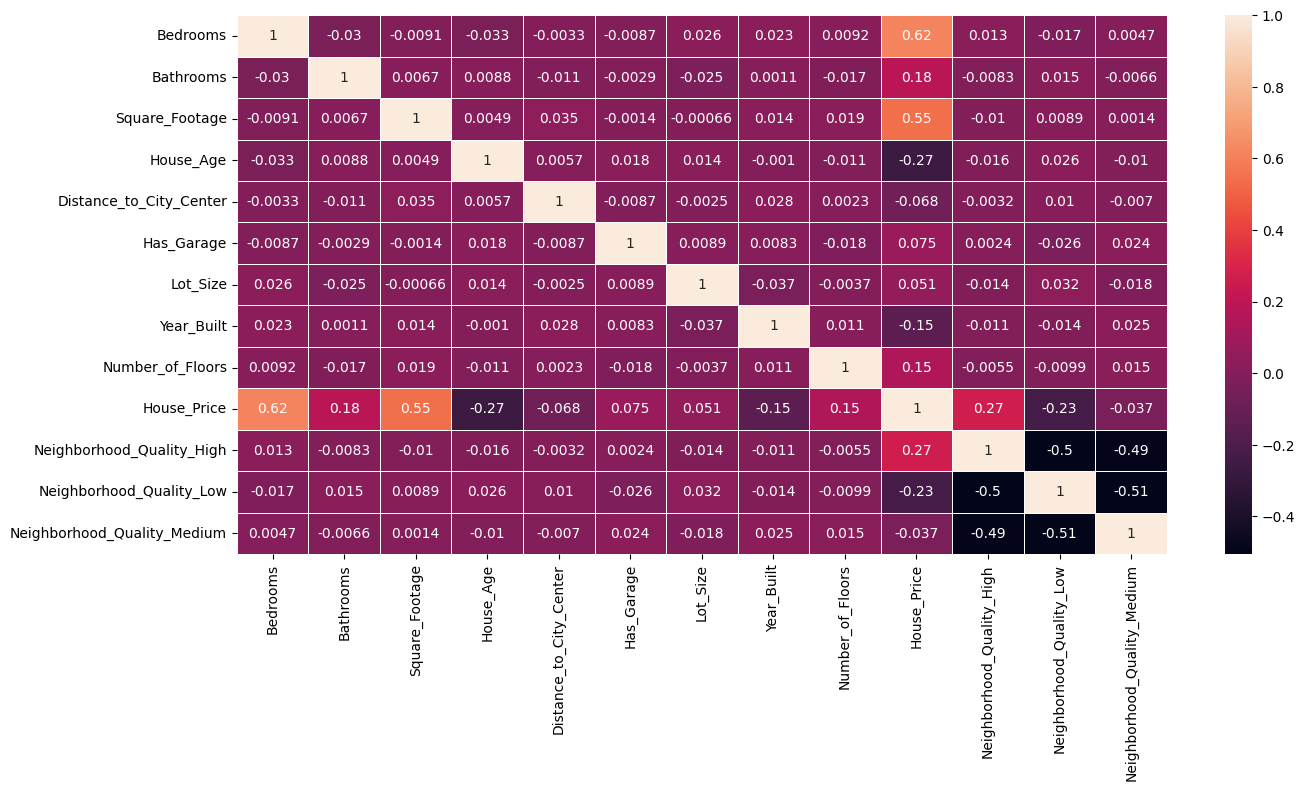

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(house_data[cols].corr(), annot=True, linewidths=0.5)

In [20]:
house_df = house_data.copy()
house_df.drop(columns=['Neighborhood_Quality', 'Neighborhood_Quality_Medium'], inplace=True)

In [21]:
scaler = StandardScaler()

scale_cols = ['Bedrooms', 'Bathrooms', 'Square_Footage', 'House_Age', 'Distance_to_City_Center', 'Lot_Size', 'Year_Built', 'Number_of_Floors', 'House_Price']

house_df[scale_cols] = scaler.fit_transform(house_data[scale_cols])

In [22]:
house_df

,Bedrooms,Bathrooms,Square_Footage,House_Age,Distance_to_City_Center,Has_Garage,Lot_Size,Year_Built,Number_of_Floors,House_Price,Neighborhood_Quality_High,Neighborhood_Quality_Low
0,0.697766,1.212734,-1.327853,1.097285,0.510681,1.0,-1.389619,1.678082,1.252002,-0.757229,0.0,1.0
1,1.405201,-1.246341,0.651346,0.714717,0.471173,0.0,-1.053442,-1.136089,1.252002,1.121488,0.0,0.0
2,-0.009668,1.212734,0.791321,-0.606880,0.176110,1.0,-1.694398,-0.941048,1.252002,0.914543,0.0,0.0
3,1.405201,-1.246341,1.026697,-1.719804,-1.727482,0.0,-1.086393,-1.637625,0.035285,1.729527,0.0,0.0
4,1.405201,-1.246341,-0.154879,-0.850332,0.678593,1.0,-0.565691,-1.331131,0.035285,1.016613,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.697766,1.212734,-0.828166,-1.545909,-0.195751,1.0,0.474054,0.842190,0.035285,1.036152,1.0,0.0
2996,1.405201,1.212734,1.650720,-1.511130,1.453022,0.0,-0.083275,1.204410,0.035285,2.094631,0.0,0.0
2997,-0.009668,-0.016804,-0.789849,-0.815553,-0.124362,1.0,-0.084794,-1.498310,-1.181433,0.303153,1.0,0.0
2998,-0.717103,1.212734,0.757695,-0.224312,-0.801563,1.0,0.734185,-0.550965,-1.181433,0.469864,0.0,0.0


In [23]:
cols = house_df.columns.tolist()
cols.remove('House_Price')
cols.append('House_Price')
house_df = house_df[cols]
house_df

,Bedrooms,Bathrooms,Square_Footage,House_Age,Distance_to_City_Center,Has_Garage,Lot_Size,Year_Built,Number_of_Floors,Neighborhood_Quality_High,Neighborhood_Quality_Low,House_Price
0,0.697766,1.212734,-1.327853,1.097285,0.510681,1.0,-1.389619,1.678082,1.252002,0.0,1.0,-0.757229
1,1.405201,-1.246341,0.651346,0.714717,0.471173,0.0,-1.053442,-1.136089,1.252002,0.0,0.0,1.121488
2,-0.009668,1.212734,0.791321,-0.606880,0.176110,1.0,-1.694398,-0.941048,1.252002,0.0,0.0,0.914543
3,1.405201,-1.246341,1.026697,-1.719804,-1.727482,0.0,-1.086393,-1.637625,0.035285,0.0,0.0,1.729527
4,1.405201,-1.246341,-0.154879,-0.850332,0.678593,1.0,-0.565691,-1.331131,0.035285,0.0,1.0,1.016613
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.697766,1.212734,-0.828166,-1.545909,-0.195751,1.0,0.474054,0.842190,0.035285,1.0,0.0,1.036152
2996,1.405201,1.212734,1.650720,-1.511130,1.453022,0.0,-0.083275,1.204410,0.035285,0.0,0.0,2.094631
2997,-0.009668,-0.016804,-0.789849,-0.815553,-0.124362,1.0,-0.084794,-1.498310,-1.181433,1.0,0.0,0.303153
2998,-0.717103,1.212734,0.757695,-0.224312,-0.801563,1.0,0.734185,-0.550965,-1.181433,0.0,0.0,0.469864


In [24]:
# Creating training, validation, testing dataset

train_df, test_df = train_test_split(house_df, train_size=0.8, random_state=42)
train_df, val_df = train_test_split(train_df, train_size=0.8, random_state=42)

train_df.shape, val_df.shape, test_df.shape

((1920, 12), (480, 12), (600, 12))

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [26]:
# Dataset class for Batches
class HouseDataset(Dataset):
    def __init__(self, data) -> None:
        data = data.to_numpy(dtype='float32')
        self.X = torch.tensor(data[:, :-1], dtype=torch.float32).to(device)
        self.y = torch.tensor(data[:, -1], dtype=torch.float32).unsqueeze(1).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [27]:
train_dataset = HouseDataset(train_df)
val_dataset = HouseDataset(val_df)
test_dataset = HouseDataset(test_df)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

In [28]:
# Neural Network with singel hidden layer of 32 neurons and ReLU Activation

class HousePriceNNRelu(nn.Module):
    def __init__(self, input_dim) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

In [29]:
model_relu = HousePriceNNRelu(input_dim=train_dataset.X.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model_relu.parameters(), lr=0.001)

In [30]:
num_epochs = 500
patience = 20
best_val_loss = float('inf')
epochs_no_improve = 0
train_losses_relu = []
val_losses_relu = []
relu_gradients = []

for epoch in range(num_epochs):
    # Training
    model_relu.train()
    train_loss = 0
    relu_grad_epoch = []
    for X_batch, y_batch in train_loader:
        outputs = model_relu(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()

        # Calculating gradient magnitudes
        batch_grads = []
        for param in model_relu.parameters():
            if param.grad is not None:
                batch_grads.append(param.grad.norm().item())
        if batch_grads:
            relu_grad_epoch.append(sum(batch_grads) / len(batch_grads))

        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)

    # Storing gradient magnitude values
    if relu_grad_epoch:
        avg_relu_grad = sum(relu_grad_epoch) / len(relu_grad_epoch)
        relu_gradients.append(avg_relu_grad)
    else:
        relu_gradients.append(0.0)

    # Validation
    model_relu.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            val_outputs = model_relu(X_val)
            v_loss = criterion(val_outputs, y_val)

            val_loss += v_loss.item() * X_val.size(0)
    val_loss /= len(val_loader.dataset)

    # Storing losses
    train_losses_relu.append(train_loss)
    val_losses_relu.append(val_loss)

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve > patience:
        print(f'Early Stopping at epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        break

    # Overfitting
    if train_loss < val_loss and epochs_no_improve > patience:
        print(f"Possible overfitting at epoch {epoch+1}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")
        break

    if (epoch+1) % 50 == 0:
        print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Epoch: 50/500, Train Loss: 0.1122, Validation Loss: 0.1009
Epoch: 100/500, Train Loss: 0.0887, Validation Loss: 0.0782
Epoch: 150/500, Train Loss: 0.0812, Validation Loss: 0.0714
Epoch: 200/500, Train Loss: 0.0778, Validation Loss: 0.0687
Epoch: 250/500, Train Loss: 0.0761, Validation Loss: 0.0674
Epoch: 300/500, Train Loss: 0.0750, Validation Loss: 0.0666
Epoch: 350/500, Train Loss: 0.0742, Validation Loss: 0.0660
Epoch: 400/500, Train Loss: 0.0736, Validation Loss: 0.0656
Epoch: 450/500, Train Loss: 0.0731, Validation Loss: 0.0653
Epoch: 500/500, Train Loss: 0.0726, Validation Loss: 0.0651


In [31]:
# Neural Network with singel hidden layer of 32 neurons and Tanh Activation

class HousePriceNNTanh(nn.Module):
    def __init__(self, input_dim) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

In [32]:
model_tanh = HousePriceNNTanh(input_dim=train_dataset.X.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model_tanh.parameters(), lr=0.001)

In [33]:
num_epochs = 500
patience = 20
best_val_loss = float('inf')
epochs_no_improve = 0
train_losses_tanh = []
val_losses_tanh = []
tanh_gradients = []

for epoch in range(num_epochs):
    # Training
    model_tanh.train()
    train_loss = 0
    tanh_grad_epoch = []

    for X_batch, y_batch in train_loader:
        outputs = model_tanh(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()

        # Calculating gradient magnitudes
        batch_grads = []
        for param in model_tanh.parameters():
            if param.grad is not None:
                batch_grads.append(param.grad.norm().item())
        if batch_grads:
            tanh_grad_epoch.append(sum(batch_grads) / len(batch_grads))

        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)

    # Storing gradient magnitude values
    if tanh_grad_epoch:
        avg_tanh_grad = sum(tanh_grad_epoch) / len(tanh_grad_epoch)
        tanh_gradients.append(avg_tanh_grad)
    else:
        tanh_gradients.append(0.0)

    # Validation
    model_tanh.eval()
    val_loss = 0

    with torch.no_grad():
        for X_val, y_val in val_loader:
            val_outputs = model_tanh(X_val)
            v_loss = criterion(val_outputs, y_val)

            val_loss += v_loss.item() * X_val.size(0)
    val_loss /= len(val_loader.dataset)

    # Storing losses
    train_losses_tanh.append(train_loss)
    val_losses_tanh.append(val_loss)

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve > patience:
        print(f'Early Stopping at epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        break

    # Overfitting
    if train_loss < val_loss and epochs_no_improve > patience:
        print(f"Possible overfitting at epoch {epoch+1}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")
        break

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Epoch 50/500, Train Loss: 0.0820, Validation Loss: 0.0708
Epoch 100/500, Train Loss: 0.0785, Validation Loss: 0.0679
Epoch 150/500, Train Loss: 0.0775, Validation Loss: 0.0672
Epoch 200/500, Train Loss: 0.0768, Validation Loss: 0.0667
Epoch 250/500, Train Loss: 0.0762, Validation Loss: 0.0662
Epoch 300/500, Train Loss: 0.0757, Validation Loss: 0.0659
Epoch 350/500, Train Loss: 0.0752, Validation Loss: 0.0656
Epoch 400/500, Train Loss: 0.0748, Validation Loss: 0.0654
Epoch 450/500, Train Loss: 0.0745, Validation Loss: 0.0652
Epoch 500/500, Train Loss: 0.0742, Validation Loss: 0.0650


In [34]:
model_relu.eval()
relu_test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_relu(X_batch)
        loss = criterion(outputs, y_batch)
        relu_test_loss += loss.item() * X_batch.size(0)
relu_test_loss /= len(test_loader.dataset)
print(f"Relu Test loss: {relu_test_loss}")

Relu Test loss: 0.07225130309661229


In [35]:
model_tanh.eval()
tanh_test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_tanh(X_batch)
        loss = criterion(outputs, y_batch)
        tanh_test_loss += loss.item() * X_batch.size(0)
tanh_test_loss /= len(test_loader.dataset)
print(f"Tanh Test loss: {tanh_test_loss}")

Tanh Test loss: 0.073593304057916


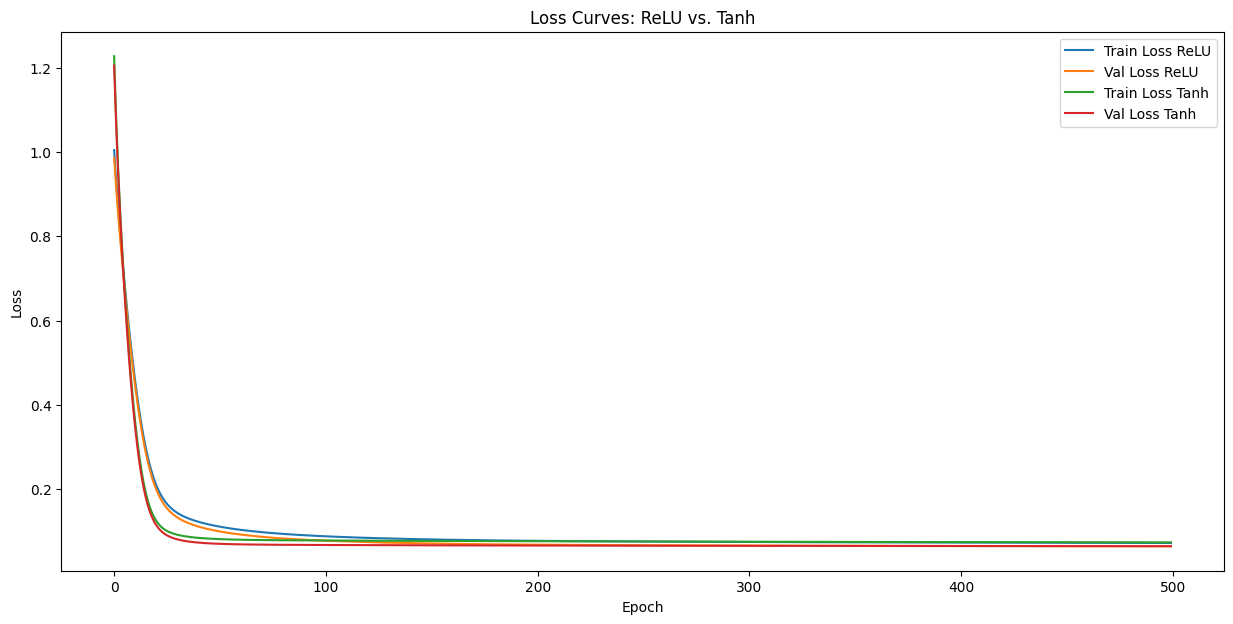

In [36]:
plt.figure(figsize=(15,7))
plt.plot(train_losses_relu, label="Train Loss ReLU")
plt.plot(val_losses_relu, label="Val Loss ReLU")
plt.plot(train_losses_tanh, label="Train Loss Tanh")
plt.plot(val_losses_tanh, label="Val Loss Tanh")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves: ReLU vs. Tanh")
plt.show()

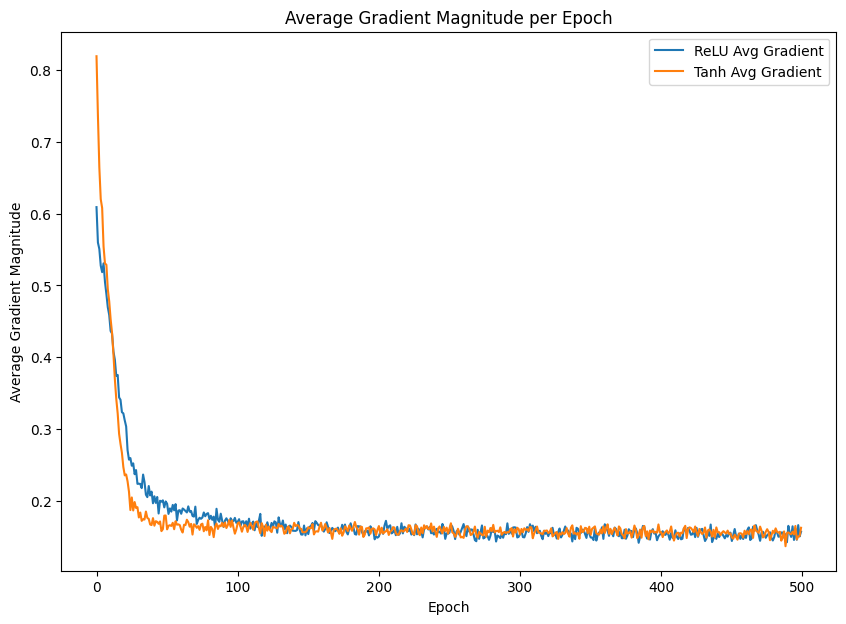

In [37]:
plt.figure(figsize=(10,7))
plt.plot(relu_gradients, label="ReLU Avg Gradient")
plt.plot(tanh_gradients, label="Tanh Avg Gradient")
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Average Gradient Magnitude per Epoch")
plt.legend()
plt.show()

In [38]:
# Neural Network with single layer and ReLU Activation
class HousePriceNNRelu1(nn.Module):
    def __init__(self, input_dim) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 1),
            nn.ReLU()
        )
    def forward(self, input):
        return self.network(input)

In [39]:
model_relu = HousePriceNNRelu1(input_dim=train_dataset.X.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model_relu.parameters(), lr=0.001)

In [40]:
num_epochs = 500
patience = 20
best_val_loss = float('inf')
epochs_no_improve = 0
train_losses_relu = []
val_losses_relu = []
relu_gradients = []

for epoch in range(num_epochs):
    # Training
    model_relu.train()
    train_loss = 0
    relu_grad_epoch = []
    for X_batch, y_batch in train_loader:
        outputs = model_relu(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()

        # Calculating gradient magnitudes
        batch_grads = []
        for param in model_relu.parameters():
            if param.grad is not None:
                batch_grads.append(param.grad.norm().item())
        if batch_grads:
            relu_grad_epoch.append(sum(batch_grads) / len(batch_grads))

        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)

    # Storing gradient magnitude values
    if relu_grad_epoch:
        avg_relu_grad = sum(relu_grad_epoch) / len(relu_grad_epoch)
        relu_gradients.append(avg_relu_grad)
    else:
        relu_gradients.append(0.0)

    # Validation
    model_relu.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            val_outputs = model_relu(X_val)
            v_loss = criterion(val_outputs, y_val)

            val_loss += v_loss.item() * X_val.size(0)
    val_loss /= len(val_loader.dataset)

    # Storing losses
    train_losses_relu.append(train_loss)
    val_losses_relu.append(val_loss)

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve > patience:
        print(f'Early Stopping at epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        break

    # Overfitting
    if train_loss < val_loss and epochs_no_improve > patience:
        print(f"Possible overfitting at epoch {epoch+1}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")
        break

    if (epoch+1) % 50 == 0:
        print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Epoch: 50/500, Train Loss: 0.5560, Validation Loss: 0.5820
Epoch: 100/500, Train Loss: 0.5452, Validation Loss: 0.5714
Epoch: 150/500, Train Loss: 0.5423, Validation Loss: 0.5684
Epoch: 200/500, Train Loss: 0.5412, Validation Loss: 0.5673
Epoch: 250/500, Train Loss: 0.5406, Validation Loss: 0.5667
Epoch: 300/500, Train Loss: 0.5403, Validation Loss: 0.5664
Epoch: 350/500, Train Loss: 0.5402, Validation Loss: 0.5663
Epoch: 400/500, Train Loss: 0.5401, Validation Loss: 0.5662
Epoch: 450/500, Train Loss: 0.5400, Validation Loss: 0.5661
Epoch: 500/500, Train Loss: 0.5400, Validation Loss: 0.5661


In [41]:
# Neural Network with single layer and Tanh Activation
class HousePriceNNTanh1(nn.Module):
    def __init__(self, input_dim) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 1),
            nn.Tanh()
        )
    def forward(self, input):
        return self.network(input)

In [42]:
model_tanh = HousePriceNNTanh1(input_dim=train_dataset.X.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model_tanh.parameters(), lr=0.001)

In [43]:
num_epochs = 500
patience = 20
best_val_loss = float('inf')
epochs_no_improve = 0
train_losses_tanh = []
val_losses_tanh = []
tanh_gradients = []

for epoch in range(num_epochs):
    # Training
    model_tanh.train()
    train_loss = 0
    tanh_grad_epoch = []

    for X_batch, y_batch in train_loader:
        outputs = model_tanh(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()

        # Calculating gradient magnitudes
        batch_grads = []
        for param in model_tanh.parameters():
            if param.grad is not None:
                batch_grads.append(param.grad.norm().item())
        if batch_grads:
            tanh_grad_epoch.append(sum(batch_grads) / len(batch_grads))

        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)

    # Storing gradient magnitude values
    if tanh_grad_epoch:
        avg_tanh_grad = sum(tanh_grad_epoch) / len(tanh_grad_epoch)
        tanh_gradients.append(avg_tanh_grad)
    else:
        tanh_gradients.append(0.0)

    # Validation
    model_tanh.eval()
    val_loss = 0

    with torch.no_grad():
        for X_val, y_val in val_loader:
            val_outputs = model_tanh(X_val)
            v_loss = criterion(val_outputs, y_val)

            val_loss += v_loss.item() * X_val.size(0)
    val_loss /= len(val_loader.dataset)

    # Storing losses
    train_losses_tanh.append(train_loss)
    val_losses_tanh.append(val_loss)

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve > patience:
        print(f'Early Stopping at epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        break

    # Overfitting
    if train_loss < val_loss and epochs_no_improve > patience:
        print(f"Possible overfitting at epoch {epoch+1}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")
        break

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Epoch 50/500, Train Loss: 0.2184, Validation Loss: 0.2221
Epoch 100/500, Train Loss: 0.2032, Validation Loss: 0.2044
Epoch 150/500, Train Loss: 0.1995, Validation Loss: 0.1996
Epoch 200/500, Train Loss: 0.1982, Validation Loss: 0.1976
Epoch 250/500, Train Loss: 0.1976, Validation Loss: 0.1967
Epoch 300/500, Train Loss: 0.1973, Validation Loss: 0.1961
Epoch 350/500, Train Loss: 0.1971, Validation Loss: 0.1958
Epoch 400/500, Train Loss: 0.1970, Validation Loss: 0.1956
Epoch 450/500, Train Loss: 0.1969, Validation Loss: 0.1955
Epoch 500/500, Train Loss: 0.1969, Validation Loss: 0.1954


In [44]:
model_relu.eval()
relu_test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_relu(X_batch)
        loss = criterion(outputs, y_batch)
        relu_test_loss += loss.item() * X_batch.size(0)
relu_test_loss /= len(test_loader.dataset)
print(f"Relu Test loss: {relu_test_loss}")

Relu Test loss: 0.49893285512924196


In [45]:
model_tanh.eval()
tanh_test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_tanh(X_batch)
        loss = criterion(outputs, y_batch)
        tanh_test_loss += loss.item() * X_batch.size(0)
tanh_test_loss /= len(test_loader.dataset)
print(f"Tanh Test loss: {tanh_test_loss}")

Tanh Test loss: 0.18387762029965718


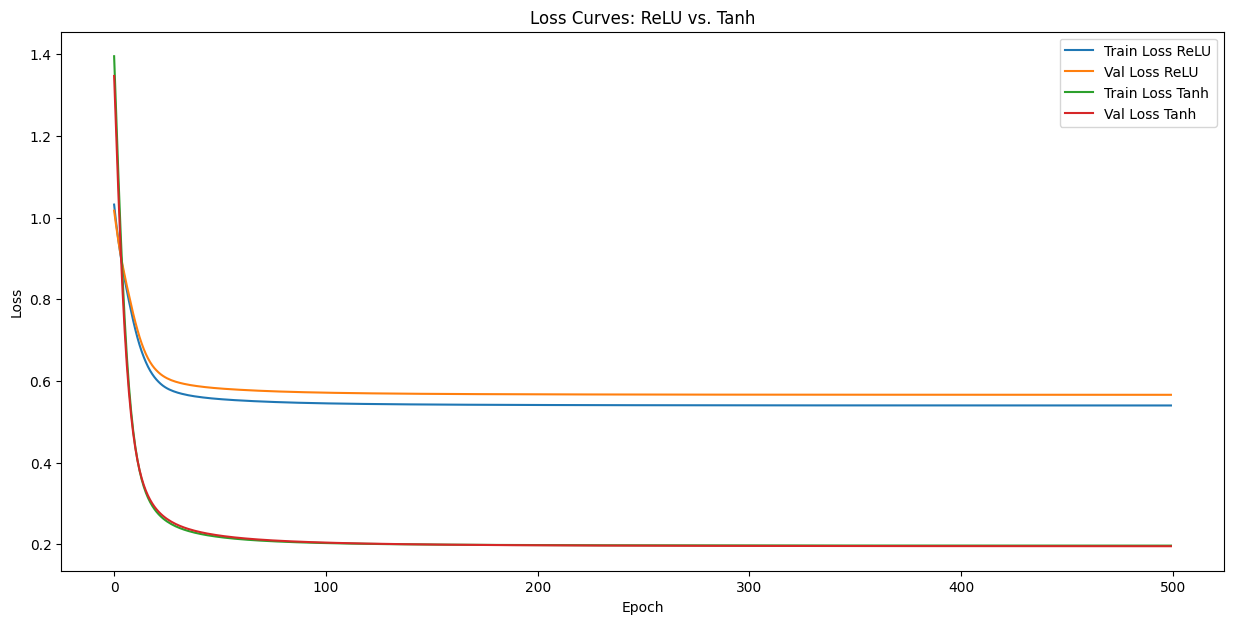

In [46]:
plt.figure(figsize=(15,7))
plt.plot(train_losses_relu, label="Train Loss ReLU")
plt.plot(val_losses_relu, label="Val Loss ReLU")
plt.plot(train_losses_tanh, label="Train Loss Tanh")
plt.plot(val_losses_tanh, label="Val Loss Tanh")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves: ReLU vs. Tanh")
plt.show()

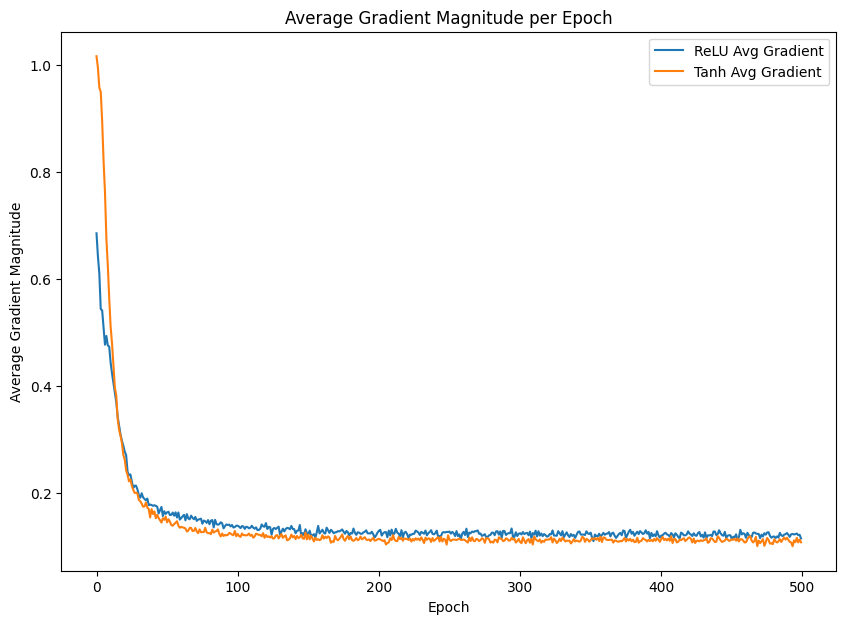

In [47]:
plt.figure(figsize=(10,7))
plt.plot(relu_gradients, label="ReLU Avg Gradient")
plt.plot(tanh_gradients, label="Tanh Avg Gradient")
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Average Gradient Magnitude per Epoch")
plt.legend()
plt.show()